In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [52]:
# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [53]:
#read the dataset
df = pd.read_csv('/content/Netflix Dataset.csv')

In [54]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [56]:
# Basic cleaning
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
# Extract Year
df['Year'] = df['Release_Date'].dt.year
# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")
# Extract Main Genre (first genre listed in 'Type')
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

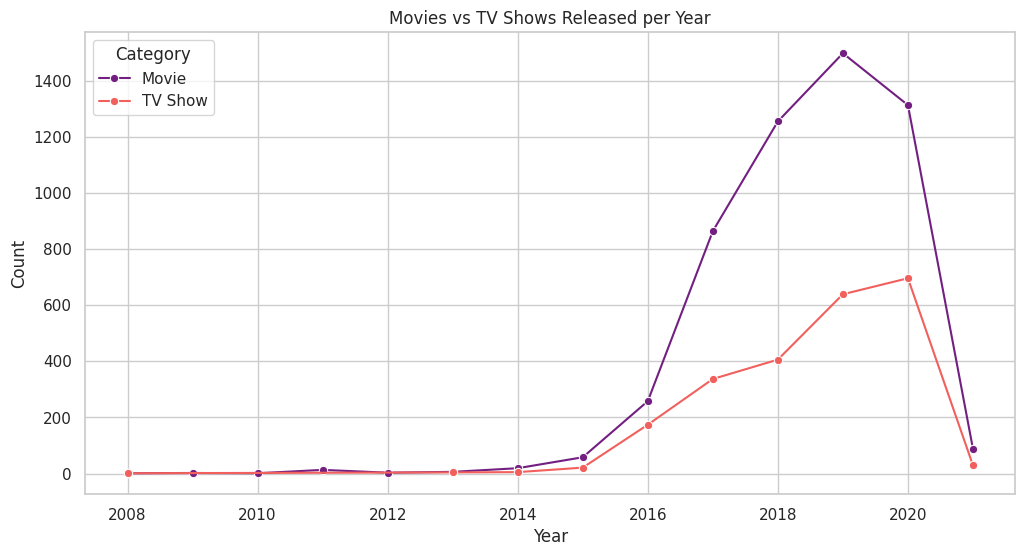

In [57]:
#Movies vs. TV Shows released per year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o', palette='magma')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

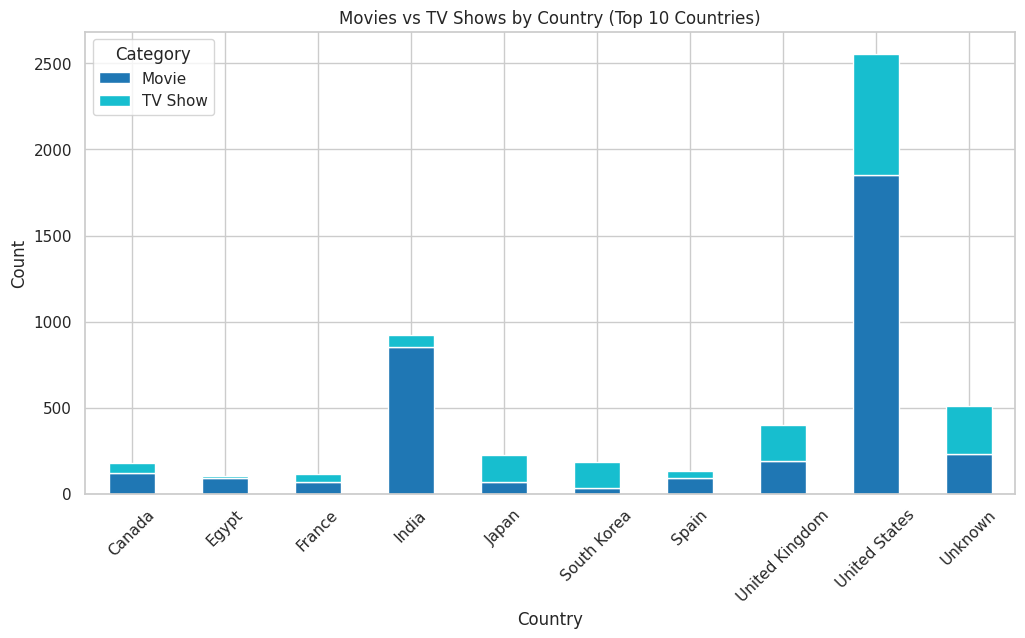

In [58]:
# Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab10")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2031093263.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




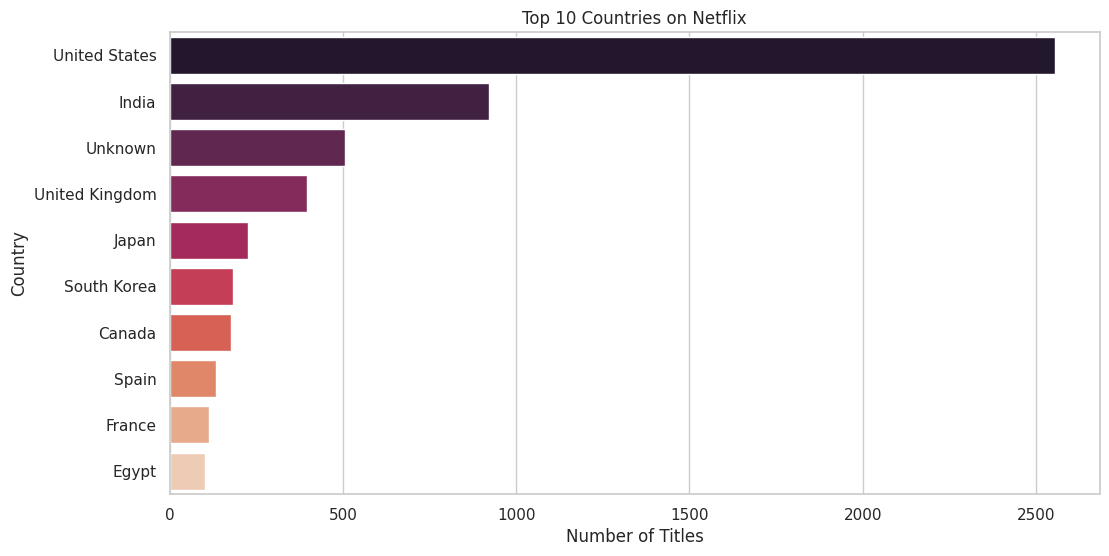

In [59]:
#Top 10 Countries on Netflix
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

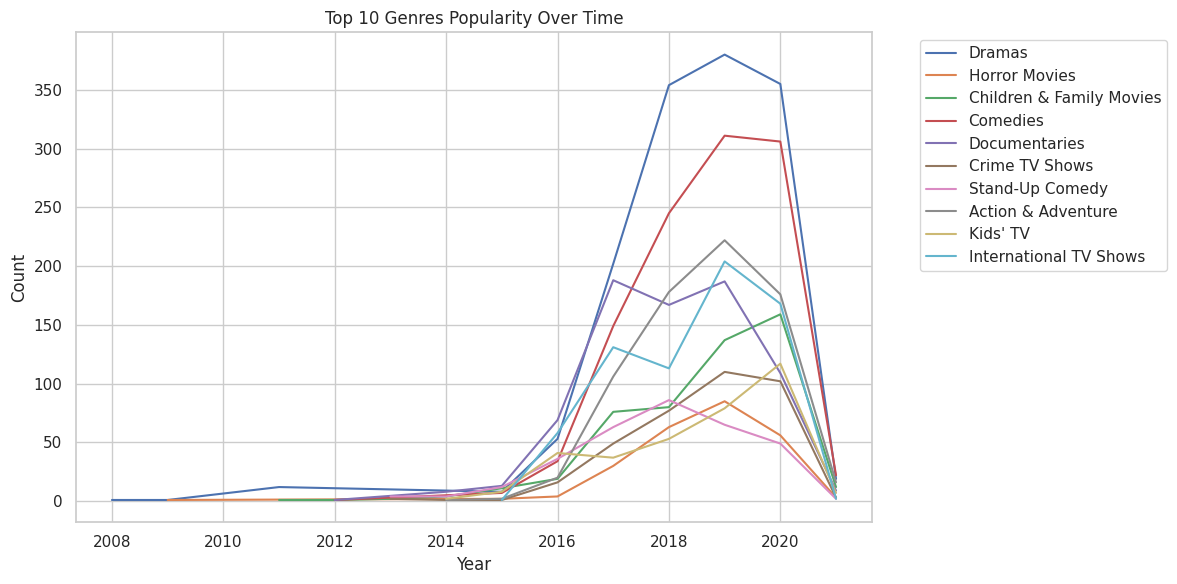

In [60]:
#Top 10 Genres Popularity Over Time
top_genres = df['Main_Genre'].value_counts().nlargest(10).index
genre_trend = df[df['Main_Genre'].isin(top_genres)].groupby(['Year', 'Main_Genre']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trend, x='Year', y='Count', hue='Main_Genre')
plt.title('Top 10 Genres Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2102714658.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




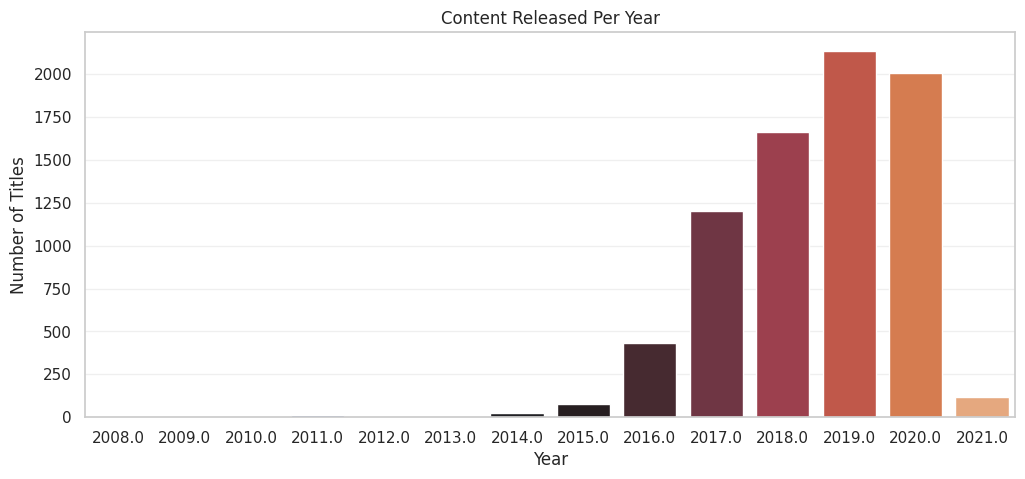

In [61]:
#Content Release per Year
year_count = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.barplot(x=year_count.index, y=year_count.values, palette='icefire')
plt.title('Content Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', alpha=0.3)
plt.show()

/tmp/ipython-input-2187330671.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




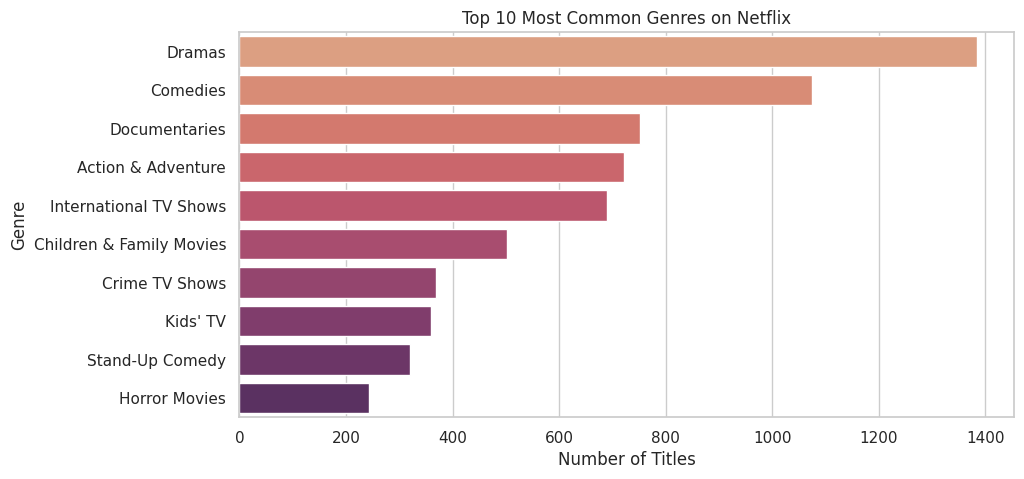

In [62]:
df['Main_Genre'] = df['Main_Genre'].fillna('Unknown')
# Top 10 genres by count
top_genres = df['Main_Genre'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='flare')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()